In [52]:
from math import sqrt, pi, log, exp

def integrate_log_normal(mean : float, sd : float, a : float, b : float) -> float:
    t1 = a ** 2
    t5 = sd ** 2
    t6 = log(2)
    t9 = log(pi)
    t12 = log(sd)
    t15 = b ** 2
    t18 = mean ** 2
    return 0.1e1 / t5 * (a - b) * (t1 + (-3 * mean + b) * a + 3 * t6 * t5 + 3 * t9 * t5 + 6 * t12 * t5 + t15 - 3 * b * mean + 3 * t18) / 6

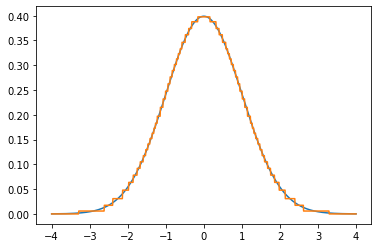

In [53]:
import spnhelp
import matplotlib.pyplot as plt
import scipy.stats as stats
from spn.algorithms.Inference import likelihood
import numpy as np

x= np.linspace(-4,4, 1000)

mu = 0
sd = 1
eps = 0.01


def kl (s, mean, e, w, mu, sd):
    kl = 0
    for i in range(len(start)):
        print
        kl += w[i] * (log(w[i]/(e[i]-s[i])) - integrate_log_normal(mu, sd, s[i], e[i]) / (e[i] - s[i]))
    return np.array(kl)



start, mean, end, weight = zip(*spnhelp.gauss_discretization_params(mu, sd, eps, spnhelp.split_until_bounded_likelihood))
  
spn = spnhelp.gauss_to_spn_discretize(mu, sd, eps, 0, spnhelp.split_until_bounded_likelihood)

plt.plot(x, stats.norm.pdf(0 + 1 * x))
plt.plot(x, likelihood(spn, x.reshape(-1, 1)));


 


In [54]:
splits = []
splits.append((zip(*spnhelp.gauss_discretization_params(mu, sd, 0.01, spnhelp.split_until_bounded_likelihood)), "bounded likelihood"))
splits.append((zip(*spnhelp.gauss_discretization_params(mu, sd, 0.05, spnhelp.split_until_bounded_log_likelihood)), "bounded log-likelihood"))
splits.append((zip(*spnhelp.gauss_discretization_params(mu, sd, 0.2, spnhelp.split_until_at_most_eps_wide)), "uniform"))
splits.append((zip(*spnhelp.gauss_discretization_params(mu, sd, 0.01, spnhelp.split_until_at_most_eps_of_cdf)), "bounded-cdf"))
for (start, _, end, weight), name in splits:
    kl_ =  kl(start, 0, end, weight, mu, sd)
    n = len(start)
    print("kl:", kl_.round(5), f"{(kl_/n):.10f}", n, name)

kl: 0.00279 0.0000449839 62 bounded likelihood
kl: 0.00118 0.0000074032 160 bounded log-likelihood
kl: 0.00188 0.0000407629 46 uniform
kl: 0.00533 0.0000416275 128 bounded-cdf


Text(0.5, 0, 'eps')

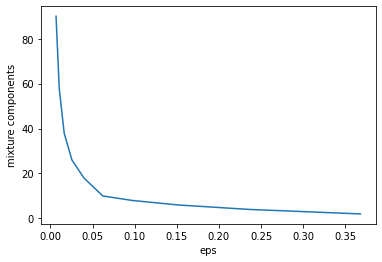

In [55]:
xs = np.exp(np.linspace(-5, -1, 10))
# plt.scatter(xs, epses)
plt.plot(xs, [len(spnhelp.gauss_discretization_params(mu, sd, e, spnhelp.split_until_bounded_likelihood)) for e in xs])
plt.ylabel("mixture components")
plt.xlabel("eps")

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]


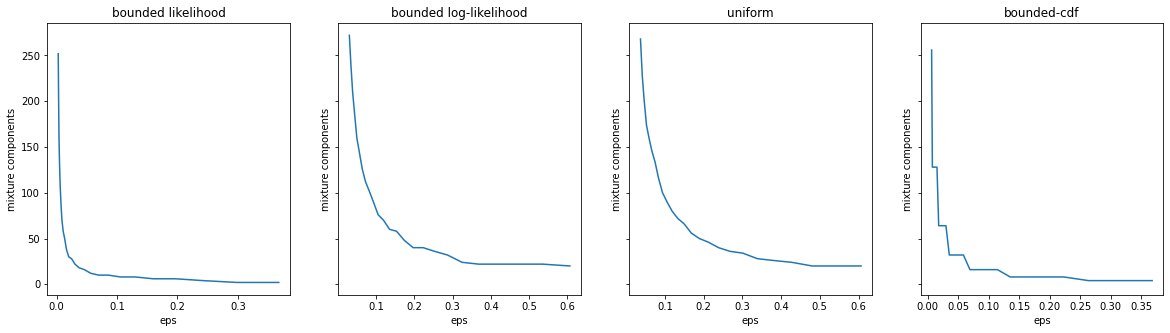

In [56]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(20,5))

names = ["bounded likelihood", "bounded log-likelihood", "uniform", "bounded-cdf"]
splits = []
splits.append((lambda e: spnhelp.gauss_discretization_params(mu, sd, e, spnhelp.split_until_bounded_likelihood), -6, -1))
splits.append((lambda e: spnhelp.gauss_discretization_params(mu, sd, e, spnhelp.split_until_bounded_log_likelihood), -3.5, -0.5))
splits.append((lambda e: spnhelp.gauss_discretization_params(mu, sd, e, spnhelp.split_until_at_most_eps_wide), -3.3, -0.5))
splits.append((lambda e: spnhelp.gauss_discretization_params(mu, sd, e, spnhelp.split_until_at_most_eps_of_cdf), -5, -1))

test_components = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
print(test_components)
kls = [[] for s in splits]

for i, (f, e_min, e_max) in enumerate(splits):
    name = names[i]
    xs = np.exp(np.linspace(e_min, e_max, 25))
    ys = np.array([len(f(e)) for e in xs])
    
    for t in test_components:
        x = xs[np.argmin(np.abs(ys - t))]
        start, _, end, weight = zip(*f(x))
        kl_ = kl(start, _, end, weight, mu, sd)
        n = len(start)
        kls[i].append((kl_, n))
        
    ax[i].plot(xs, ys)
    ax[i].set_ylabel("mixture components")
    ax[i].set_xlabel("eps")
    ax[i].set_title(name)


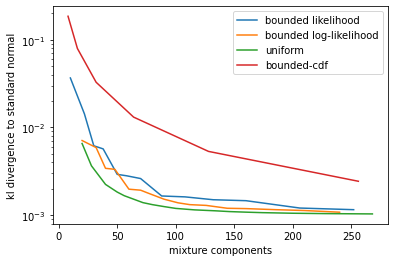

In [60]:
for run, name in zip(kls, names):
    kl_, n = zip(*run)
    plt.plot(n, kl_, label = name)
plt.xlabel("mixture components")
plt.ylabel("kl divergence to standard normal")
plt.yscale("log")
plt.legend();